In [28]:
#install.packages("Amelia")
#install.packages("Zelig")

Warning message:
"package 'combine.output' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [27]:
library(lubridate)
library(dlookr)
library(dplyr)
library(mice)
library(VIM)
library(Amelia)
library(Zelig)

ERROR: Error in library(combine.output): there is no package called 'combine.output'


In [2]:
temp2 <- tempfile()
start <- proc.time()
download.file("https://github.com/Galeforse/DST-Assessment-02/raw/main/Data/NoService/1_percent_data_no_service.csv.gz",temp2)
data1 <- (read.csv(gzfile(temp2)))
print("Data imported in:")
print(seconds_to_period((proc.time()-start)[3]))

[1] "Data imported in:"
[1] "3.73S"


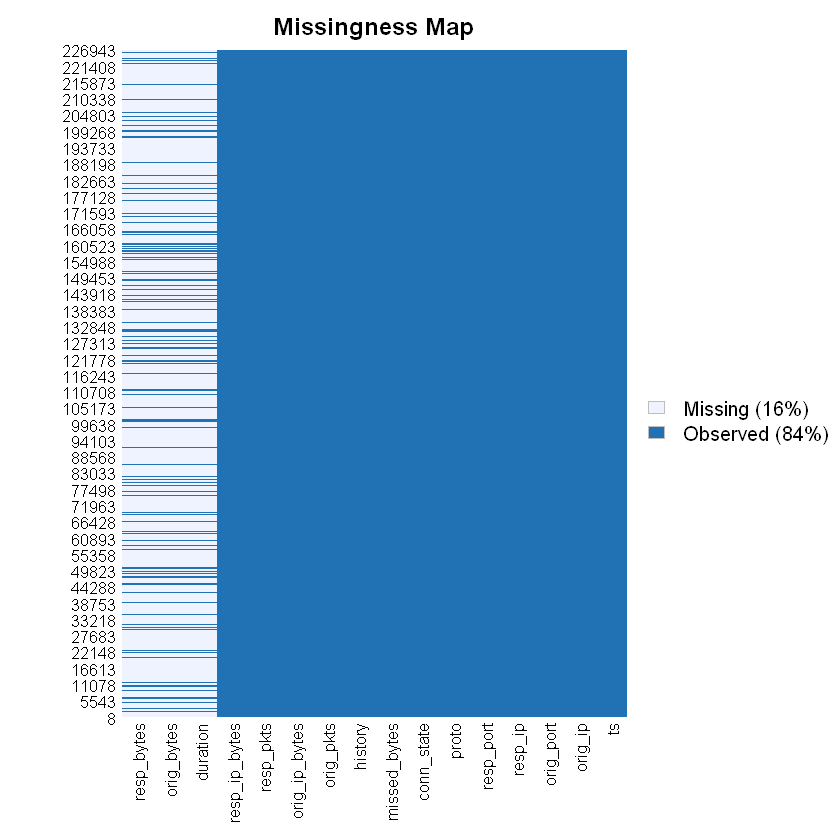

In [5]:
missmap(data1)

In [9]:
dat <- data1 %>%
    mutate(
        ts = as.numeric(ts),
        orig_ip = as.factor(orig_ip),
        resp_ip = as.factor(resp_ip),
        orig_port = as.numeric(orig_port),
        resp_port = as.numeric(resp_port),
        proto = as.factor(proto),
        conn_state = as.factor(conn_state),
        history = as.factor(history),
        duration = as.numeric(duration),
        orig_bytes = as.numeric(orig_bytes),
        resp_bytes = as.numeric(resp_bytes),
        missed_bytes = as.numeric(missed_bytes),
        orig_pkts = as.numeric(orig_pkts),
        resp_pkts = as.numeric(resp_pkts),
        orig_ip_bytes = as.numeric(orig_ip_bytes),
        resp_ip_bytes = as.numeric(resp_ip_bytes)
    )
str(dat)

'data.frame':	226943 obs. of  16 variables:
 $ ts           : num  1.33e+09 1.33e+09 1.33e+09 1.33e+09 1.33e+09 ...
 $ orig_ip      : Factor w/ 179 levels "::","0.0.0.0",..: 12 18 75 75 36 75 34 98 75 18 ...
 $ orig_port    : num  2633 11574 41267 58519 25774 ...
 $ resp_ip      : Factor w/ 2764 levels "1:dbb:c18:155:e467:81f5:8f21:4fa8",..: 1257 1313 410 410 1312 410 2132 1143 410 2545 ...
 $ resp_port    : num  80 1724 8010 5214 1625 ...
 $ proto        : Factor w/ 3 levels "icmp","tcp","udp": 2 2 2 2 2 2 2 2 2 2 ...
 $ duration     : num  0.03 NA NA NA NA NA NA NA NA NA ...
 $ orig_bytes   : num  481 NA NA NA NA NA NA NA NA NA ...
 $ resp_bytes   : num  8133 NA NA NA NA ...
 $ conn_state   : Factor w/ 13 levels "OTH","REJ","RSTO",..: 3 2 2 2 7 2 7 2 2 7 ...
 $ missed_bytes : num  0 0 0 0 0 0 0 0 0 0 ...
 $ history      : Factor w/ 139 levels "-","A","Ar","d",..: 49 139 139 139 31 139 31 139 139 31 ...
 $ orig_pkts    : num  8 1 1 1 1 1 1 1 1 1 ...
 $ orig_ip_bytes: num  813 48 60 60

In [17]:
dat1 <- subset(dat, select = -c(orig_ip,resp_ip,history,missed_bytes))
str(dat1)

'data.frame':	226943 obs. of  12 variables:
 $ ts           : num  1.33e+09 1.33e+09 1.33e+09 1.33e+09 1.33e+09 ...
 $ orig_port    : num  2633 11574 41267 58519 25774 ...
 $ resp_port    : num  80 1724 8010 5214 1625 ...
 $ proto        : Factor w/ 3 levels "icmp","tcp","udp": 2 2 2 2 2 2 2 2 2 2 ...
 $ duration     : num  0.03 NA NA NA NA NA NA NA NA NA ...
 $ orig_bytes   : num  481 NA NA NA NA NA NA NA NA NA ...
 $ resp_bytes   : num  8133 NA NA NA NA ...
 $ conn_state   : Factor w/ 13 levels "OTH","REJ","RSTO",..: 3 2 2 2 7 2 7 2 2 7 ...
 $ orig_pkts    : num  8 1 1 1 1 1 1 1 1 1 ...
 $ orig_ip_bytes: num  813 48 60 60 48 60 48 60 60 48 ...
 $ resp_pkts    : num  9 1 1 1 0 1 0 1 1 0 ...
 $ resp_ip_bytes: num  8505 40 40 40 0 ...


In [16]:
dat2 <- subset(dat, select = -c(proto,conn_state,orig_ip,resp_ip,history,missed_bytes))
str(dat2)

'data.frame':	226943 obs. of  10 variables:
 $ ts           : num  1.33e+09 1.33e+09 1.33e+09 1.33e+09 1.33e+09 ...
 $ orig_port    : num  2633 11574 41267 58519 25774 ...
 $ resp_port    : num  80 1724 8010 5214 1625 ...
 $ duration     : num  0.03 NA NA NA NA NA NA NA NA NA ...
 $ orig_bytes   : num  481 NA NA NA NA NA NA NA NA NA ...
 $ resp_bytes   : num  8133 NA NA NA NA ...
 $ orig_pkts    : num  8 1 1 1 1 1 1 1 1 1 ...
 $ orig_ip_bytes: num  813 48 60 60 48 60 48 60 60 48 ...
 $ resp_pkts    : num  9 1 1 1 0 1 0 1 1 0 ...
 $ resp_ip_bytes: num  8505 40 40 40 0 ...


In [30]:
set.seed(462)
completed_data <- amelia(dat2,m=5,ts="ts",p2s=0,)

In [31]:
write.amelia(obj=completed_data,file.stem="outdata")

In [ ]:
1 <- read.csv

In [29]:
complete <- Amelia:::combine.output(completed_data)

ERROR: Error: object of type 'closure' is not subsettable
